In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
# import data from Track 2 dataset train.csv
df = pd.read_csv('./train.csv')
display(df.head())

# get me columns of numeric and non numeric, store in two array
def get_numeric_non_numeric(df):
    numeric = []
    non_numeric = []
    for col in df.columns:
        if df[col].dtype == 'object':
            non_numeric.append(col)
        else:
            numeric.append(col)
    return numeric, non_numeric

numeric, non_numeric = get_numeric_non_numeric(df)
print(numeric)
print(non_numeric)

numeric_interested = ['rally',
  'ball_round',
  'player',
  'landing_area',
  'landing_x',
  'landing_y',
  'getpoint_player',
  'player_location_area',
  'player_location_x',
  'player_location_y',
  'opponent_location_area',
  'opponent_location_x',
  'opponent_location_y',
  'rally_length']

discrete_interested = ['rally','type', 'aroundhead', 'backhand', 'landing_height', 'lose_reason', 'player' ]

,rally,ball_round,time,frame_num,roundscore_A,roundscore_B,player,type,aroundhead,backhand,landing_height,landing_area,landing_x,landing_y,lose_reason,getpoint_player,player_location_area,player_location_x,player_location_y,opponent_location_area,opponent_location_x,opponent_location_y,set,match_id,rally_id,rally_length
0,1,1,00:06:00,10827,1,0,0,short service,0.0,1,2.0,7,0.773171,0.519687,NaN,NaN,8,170.8,308.95,8,236.7,675.21,1,1,0,8
1,1,2,00:06:01,10849,1,0,1,net shot,0.0,0,2.0,7,0.086585,-0.237240,NaN,NaN,8,208.7,594.37,8,176.8,318.46,1,1,0,8
2,1,3,00:06:02,10873,1,0,0,lob,0.0,0,1.0,3,1.402439,1.638490,NaN,NaN,7,174.2,378.28,8,180.1,622.54,1,1,0,8
3,1,4,00:06:03,10917,1,0,1,clear,0.0,0,1.0,4,1.358537,-1.434167,NaN,NaN,3,257.9,809.08,8,179.3,306.43,1,1,0,8
4,1,5,00:06:04,10943,1,0,0,drop,0.0,1,2.0,1,1.487805,0.359844,NaN,NaN,6,273.5,268.22,8,233.2,738.15,1,1,0,8


['rally', 'ball_round', 'frame_num', 'roundscore_A', 'roundscore_B', 'player', 'aroundhead', 'backhand', 'landing_height', 'landing_area', 'landing_x', 'landing_y', 'getpoint_player', 'player_location_area', 'player_location_x', 'player_location_y', 'opponent_location_area', 'opponent_location_x', 'opponent_location_y', 'set', 'match_id', 'rally_id', 'rally_length']
['time', 'type', 'lose_reason']


In [36]:
counts = df.groupby('rally_id').apply(lambda x: (x['ball_round'].values, x['player'].values))

rally_id
0       ([1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 0, 1, 0, 1, ...
7                      ([1, 2, 3, 4, 5], [1, 0, 1, 0, 1])
8       ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
10      ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 0, 1,...
11      ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ...
                              ...                        
4927    ([1, 2, 3, 4, 5, 6, 7], [34, 4, 34, 4, 34, 4, ...
4929                ([1, 2, 3, 4, 5], [34, 4, 34, 4, 34])
4934    ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
4936    ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
4938          ([1, 2, 3, 4, 5, 6], [4, 34, 4, 34, 4, 34])
Length: 2268, dtype: object

time
['00:06:00' '00:06:01' '00:06:02' ... '00:17:30' '00:17:31' '01:07:35']
00:20:12    21
00:41:29    19
00:20:09    19
00:30:43    19
00:34:22    18
            ..
0:54:29      1
0:36:51      1
01:14:48     1
00:00:39     1
01:13:33     1
Name: time, Length: 4931, dtype: int64


type
['short service' 'net shot' 'lob' 'clear' 'drop' 'push/rush' 'smash'
 'defensive shot' 'drive' 'long service']
net shot          5725
lob               5207
defensive shot    4087
smash             3682
drop              3182
clear             3078
push/rush         2011
short service     1620
drive              932
long service       648
Name: type, dtype: int64


lose_reason
[nan 'out' 'touched the net' 'not pass over the net'
 "opponent's ball landed" 'misjudged']
opponent's ball landed    701
out                       687
touched the net           533
not pass over the net     262
misjudged                  81
Name: lose_reason, dtype: int64


rally
mean:  18.69975473949357
median:  19.0
mode:  0   

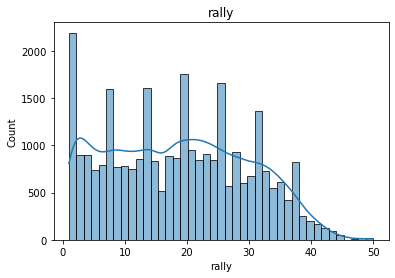

ball_round
mean:  9.824274161474214
median:  7.0
mode:  0    1
1    2
2    3
3    4
4    5
dtype: int64
min:  1
max:  70
std:  8.44655046136401
25%:  4.0
50%:  7.0
75%:  13.0




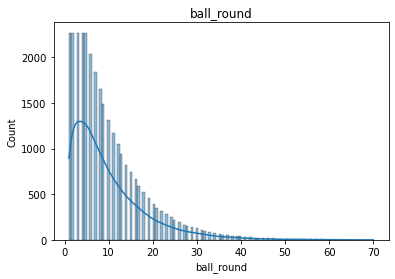

player
mean:  14.058796234919793
median:  14.0
mode:  0    10
dtype: int64
min:  0
max:  34
std:  8.92938444585024
25%:  7.0
50%:  14.0
75%:  20.0




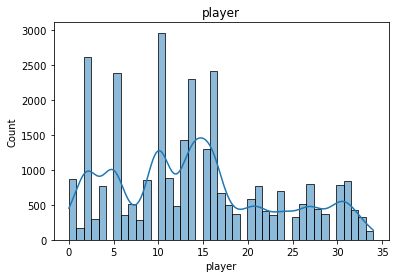

landing_area
mean:  5.292721728755137
median:  6.0
mode:  0    7
dtype: int64
min:  1
max:  10
std:  2.620827652762366
25%:  3.0
50%:  6.0
75%:  7.0




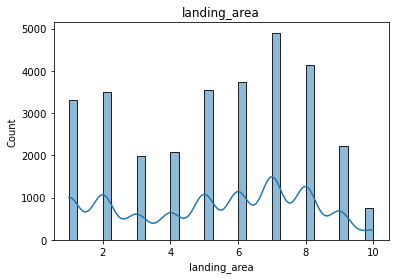

landing_x
mean:  0.021232373416800582
median:  -0.0396341463414634
mode:  0   -1.079268
dtype: float64
min:  -3.4804878048780483
max:  3.523170731707317
std:  1.004008423141121
25%:  -0.973170731707317
50%:  -0.0396341463414634
75%:  1.047560975609756




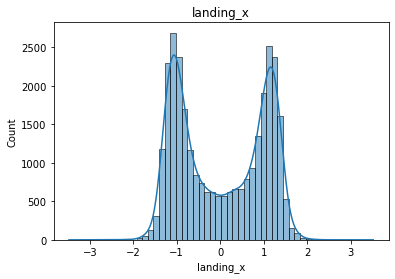

landing_y
mean:  0.04516577697589376
median:  0.1222916666666666
mode:  0   -1.408281
1    0.493646
dtype: float64
min:  -1.9617708333333328
max:  1.953125
std:  1.0141633371018086
25%:  -0.8445182291666666
50%:  0.1222916666666666
75%:  0.9191927083333334




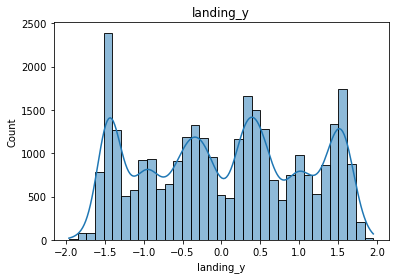

getpoint_player
mean:  13.430212014134275
median:  13.0
mode:  0    10.0
dtype: float64
min:  0.0
max:  32.0
std:  8.810194088913565
25%:  5.0
50%:  13.0
75%:  20.0




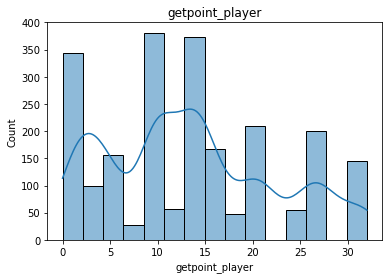

player_location_area
mean:  7.13956648548323
median:  8.0
mode:  0    8
dtype: int64
min:  1
max:  10
std:  1.932002460315809
25%:  7.0
50%:  8.0
75%:  8.0




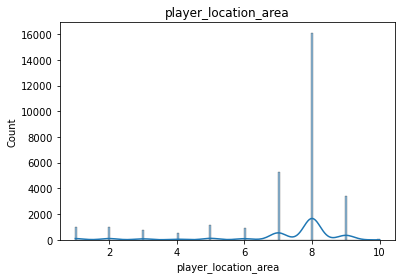

player_location_x
mean:  173.68485019223124
median:  172.0
mode:  0    120.2
dtype: float64
min:  50.1
max:  307.3
std:  53.4037046670865
25%:  125.4
50%:  172.0
75%:  222.1




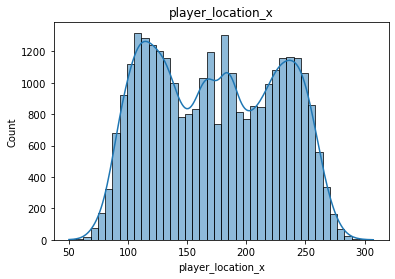

player_location_y
mean:  484.5121331035397
median:  530.5699999999999
mode:  0    613.25
dtype: float64
min:  127.55
max:  820.76
std:  196.12436540184413
25%:  312.34
50%:  530.5699999999999
75%:  657.0225




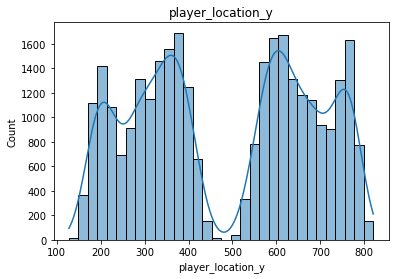

opponent_location_area
mean:  7.865637014450484
median:  8.0
mode:  0    8
dtype: int64
min:  1
max:  10
std:  0.7543207428688928
25%:  8.0
50%:  8.0
75%:  8.0




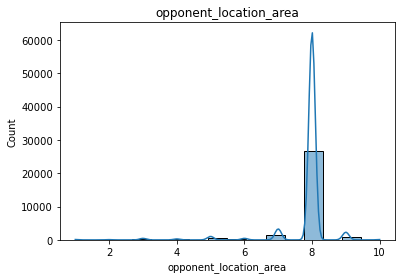

opponent_location_x
mean:  174.52970303592735
median:  173.8
mode:  0    171.8
dtype: float64
min:  23.7
max:  316.4
std:  36.83041444149242
25%:  146.8
50%:  173.8
75%:  201.8




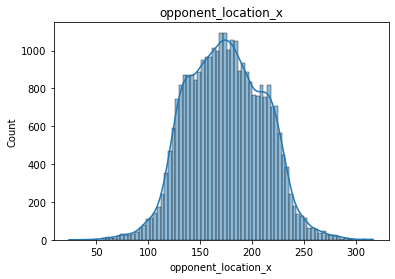

opponent_location_y
mean:  483.5973276547793
median:  562.515
mode:  0    287.19
dtype: float64
min:  128.79
max:  851.68
std:  196.52985397182073
25%:  293.835
50%:  562.515
75%:  670.05




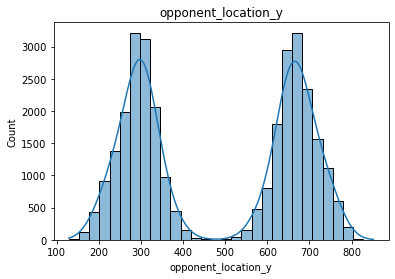

rally_length
mean:  18.64854832294843
median:  16.0
mode:  0    9
dtype: int64
min:  5
max:  70
std:  11.284399943843871
25%:  10.0
50%:  16.0
75%:  24.0




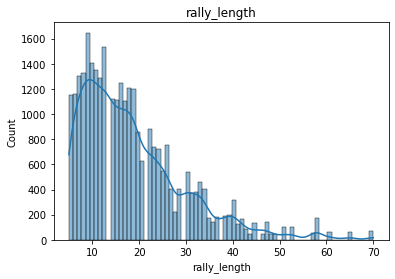

In [63]:
# do an overall quick analysis, including all the unique value in non numeric columns
def quick_analysis(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(col)
            print(df[col].unique())
            print(df[col].value_counts())
            print('\n')

quick_analysis(df)


#quick analysis on numeric column, include mean, median, mode, min, max, std, 25%, 50%, 75%, pls plot them out
def quick_analysis_numeric(df):
    for col in numeric_interested:
        if df[col].dtype != 'object':
            print(col)
            print('mean: ', df[col].mean())
            print('median: ', df[col].median())
            print('mode: ', df[col].mode())
            print('min: ', df[col].min())
            print('max: ', df[col].max())
            print('std: ', df[col].std())
            print('25%: ', df[col].quantile(0.25))
            print('50%: ', df[col].quantile(0.5))
            print('75%: ', df[col].quantile(0.75))
            print('\n')
            plt.title(col)
            sns.histplot(df[col], kde=True)            
            plt.show()

quick_analysis_numeric(df)

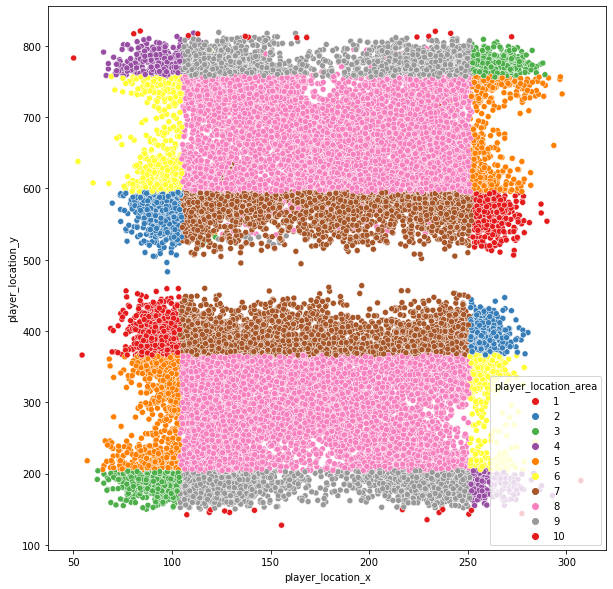

In [64]:
# plot player location x and y, and legend is the player_location_area
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='player_location_x', y='player_location_y', hue='player_location_area', palette='Set1')
plt.show()

In [65]:
# plot landing,x and landing,y, and legend is the landing_area
# make this into a function, where a parameter of object contain column key and column value as filter
def plot_scatter(df, x, y, hue, col=None, value=None):
    # filter to rows that has col == value
    if col is not None and value is not None:
        df = df[df[col] == value]
    plt.figure(figsize=(10, 10))
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='Set1')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc='upper center',
              bbox_to_anchor=(0.5, 1.1), ncol=10, fancybox=True)
    plt.title('Landing Coordinate')
    plt.show()

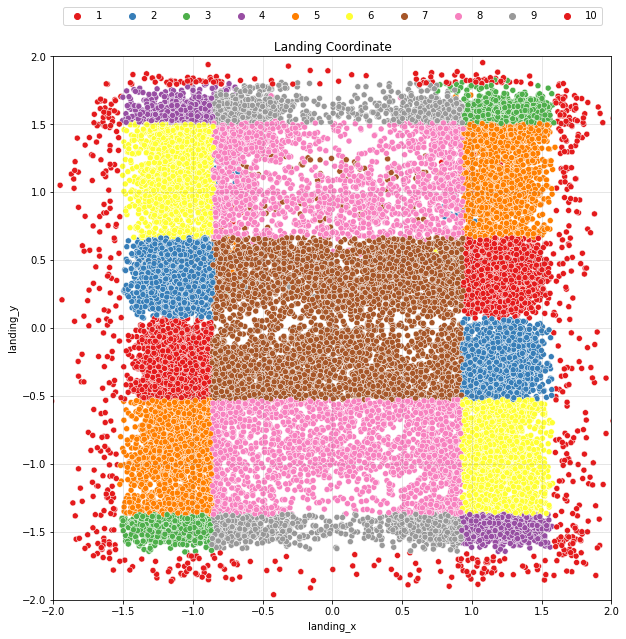

In [66]:
plot_scatter(df, 'landing_x', 'landing_y', 'landing_area')

### Breakdown landing distribution for each shot type

['short service', 'net shot', 'lob', 'clear', 'drop', 'push/rush', 'smash', 'defensive shot', 'drive', 'long service']


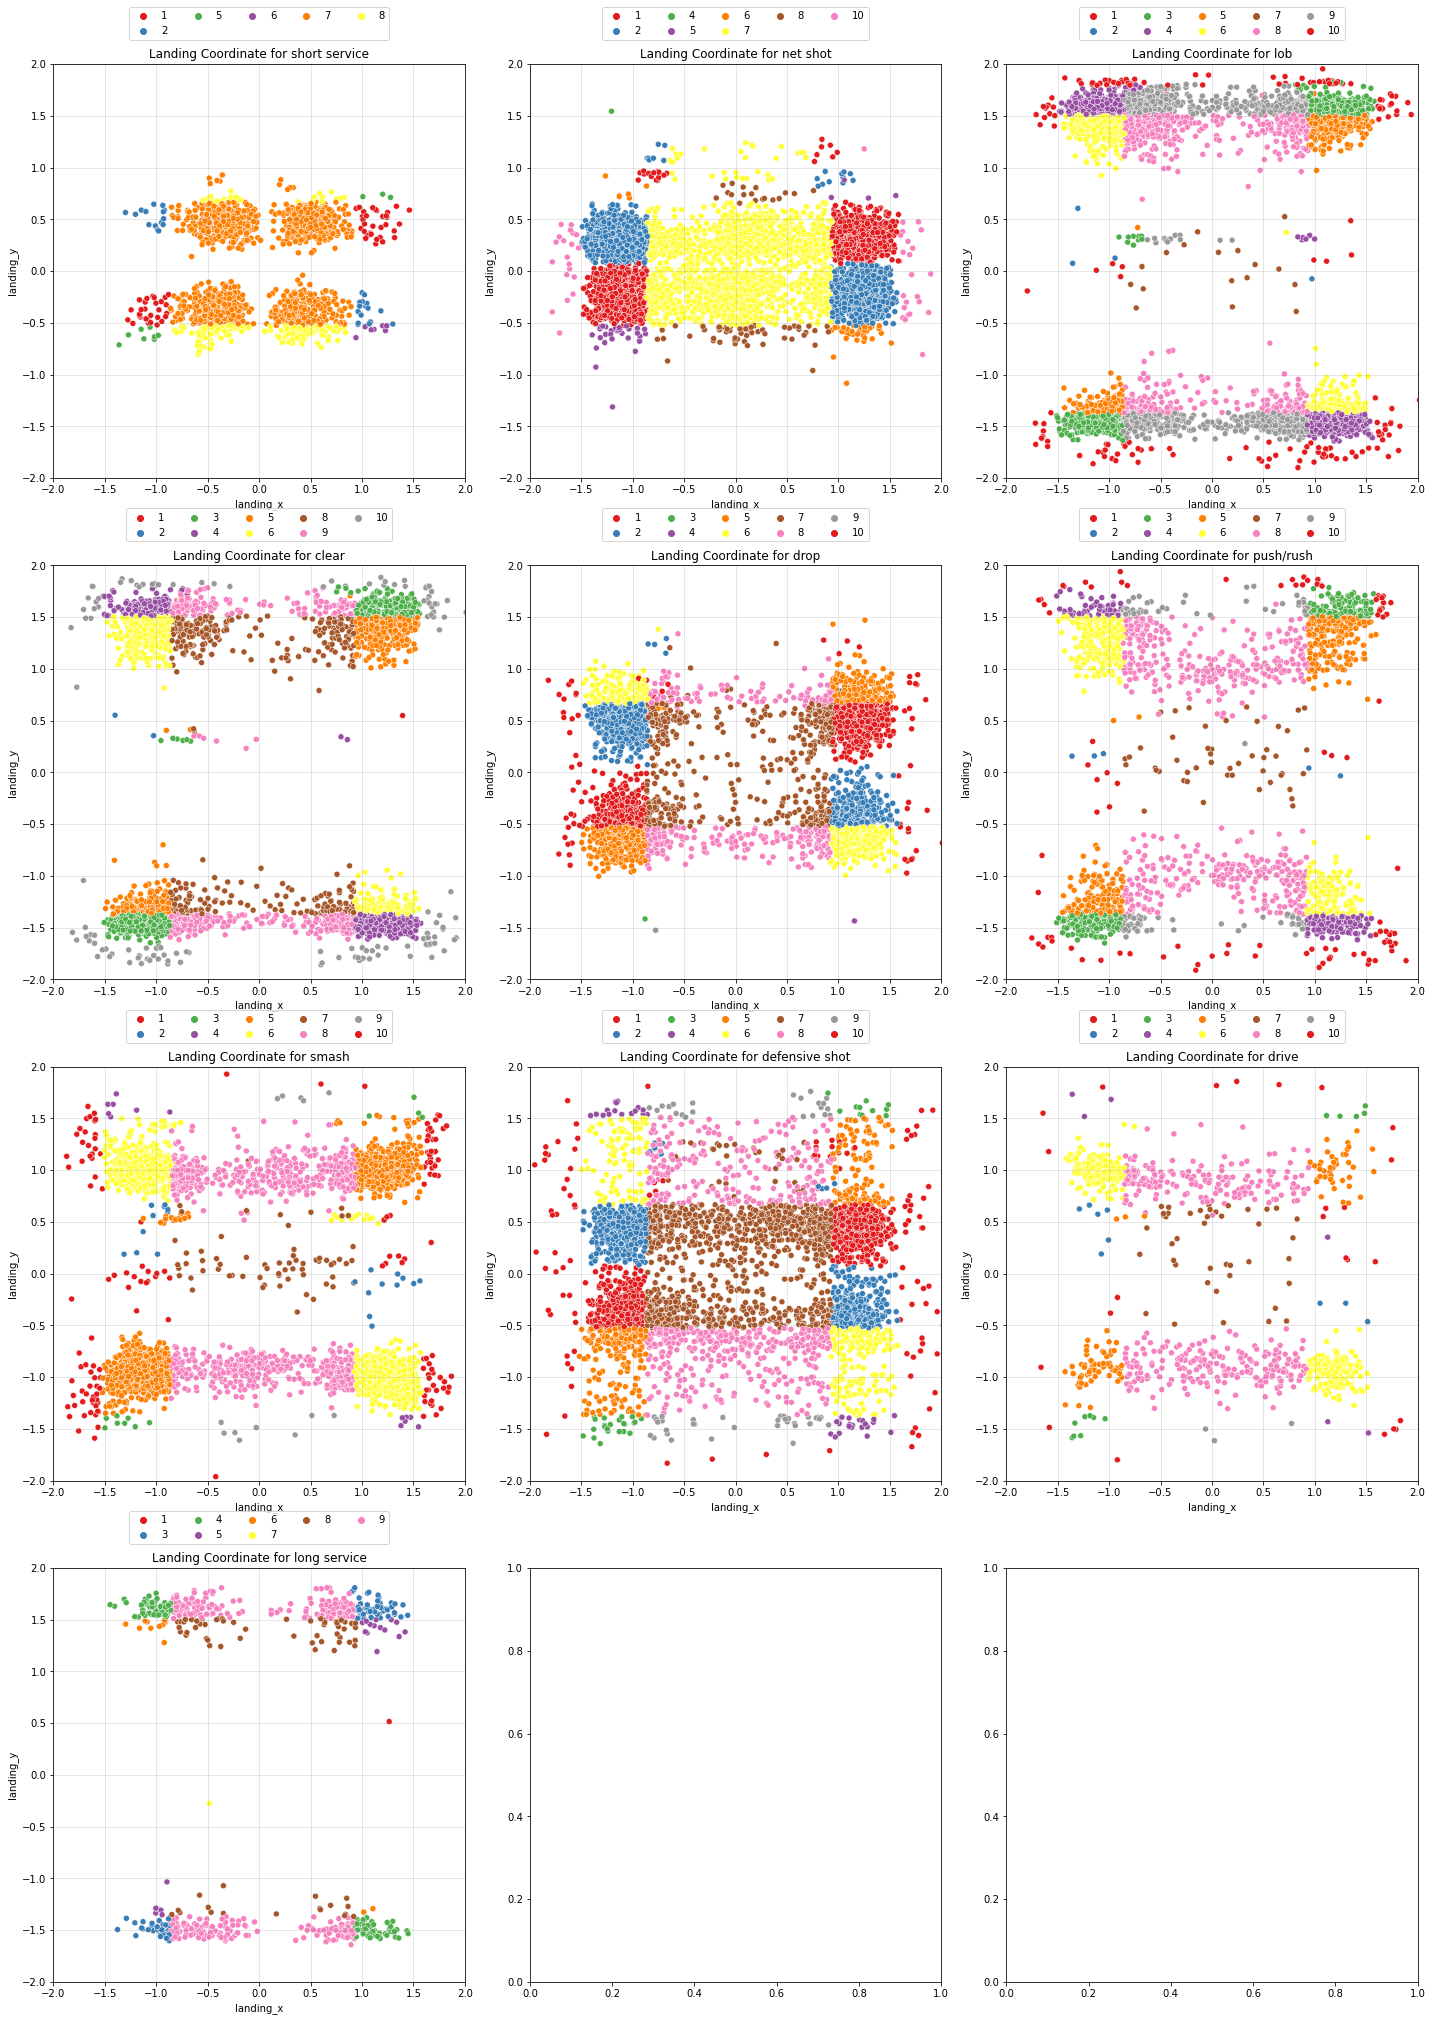

In [67]:
shot_type_list = df['type'].unique().tolist()
print(shot_type_list)

def plot_scatter_shot_type(df, shot_type):
    num_plots = len(shot_type)
    fig, axs = plt.subplots((num_plots+2)//3, 3, figsize=(20, 7*(num_plots+2)//3))
    for i, shot in enumerate(shot_type):
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
        dff = df[df['type'] == shot]
        sns.scatterplot(data=dff, x='landing_x', y='landing_y',
                        hue='landing_area', palette='Set1', ax=ax)
        ax.set_title(f'Landing Coordinate for {shot}')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True)
    plt.tight_layout()
    plt.show()

plot_scatter_shot_type(df, shot_type_list)

### Analyse for each landing area, what is the most possible shot type

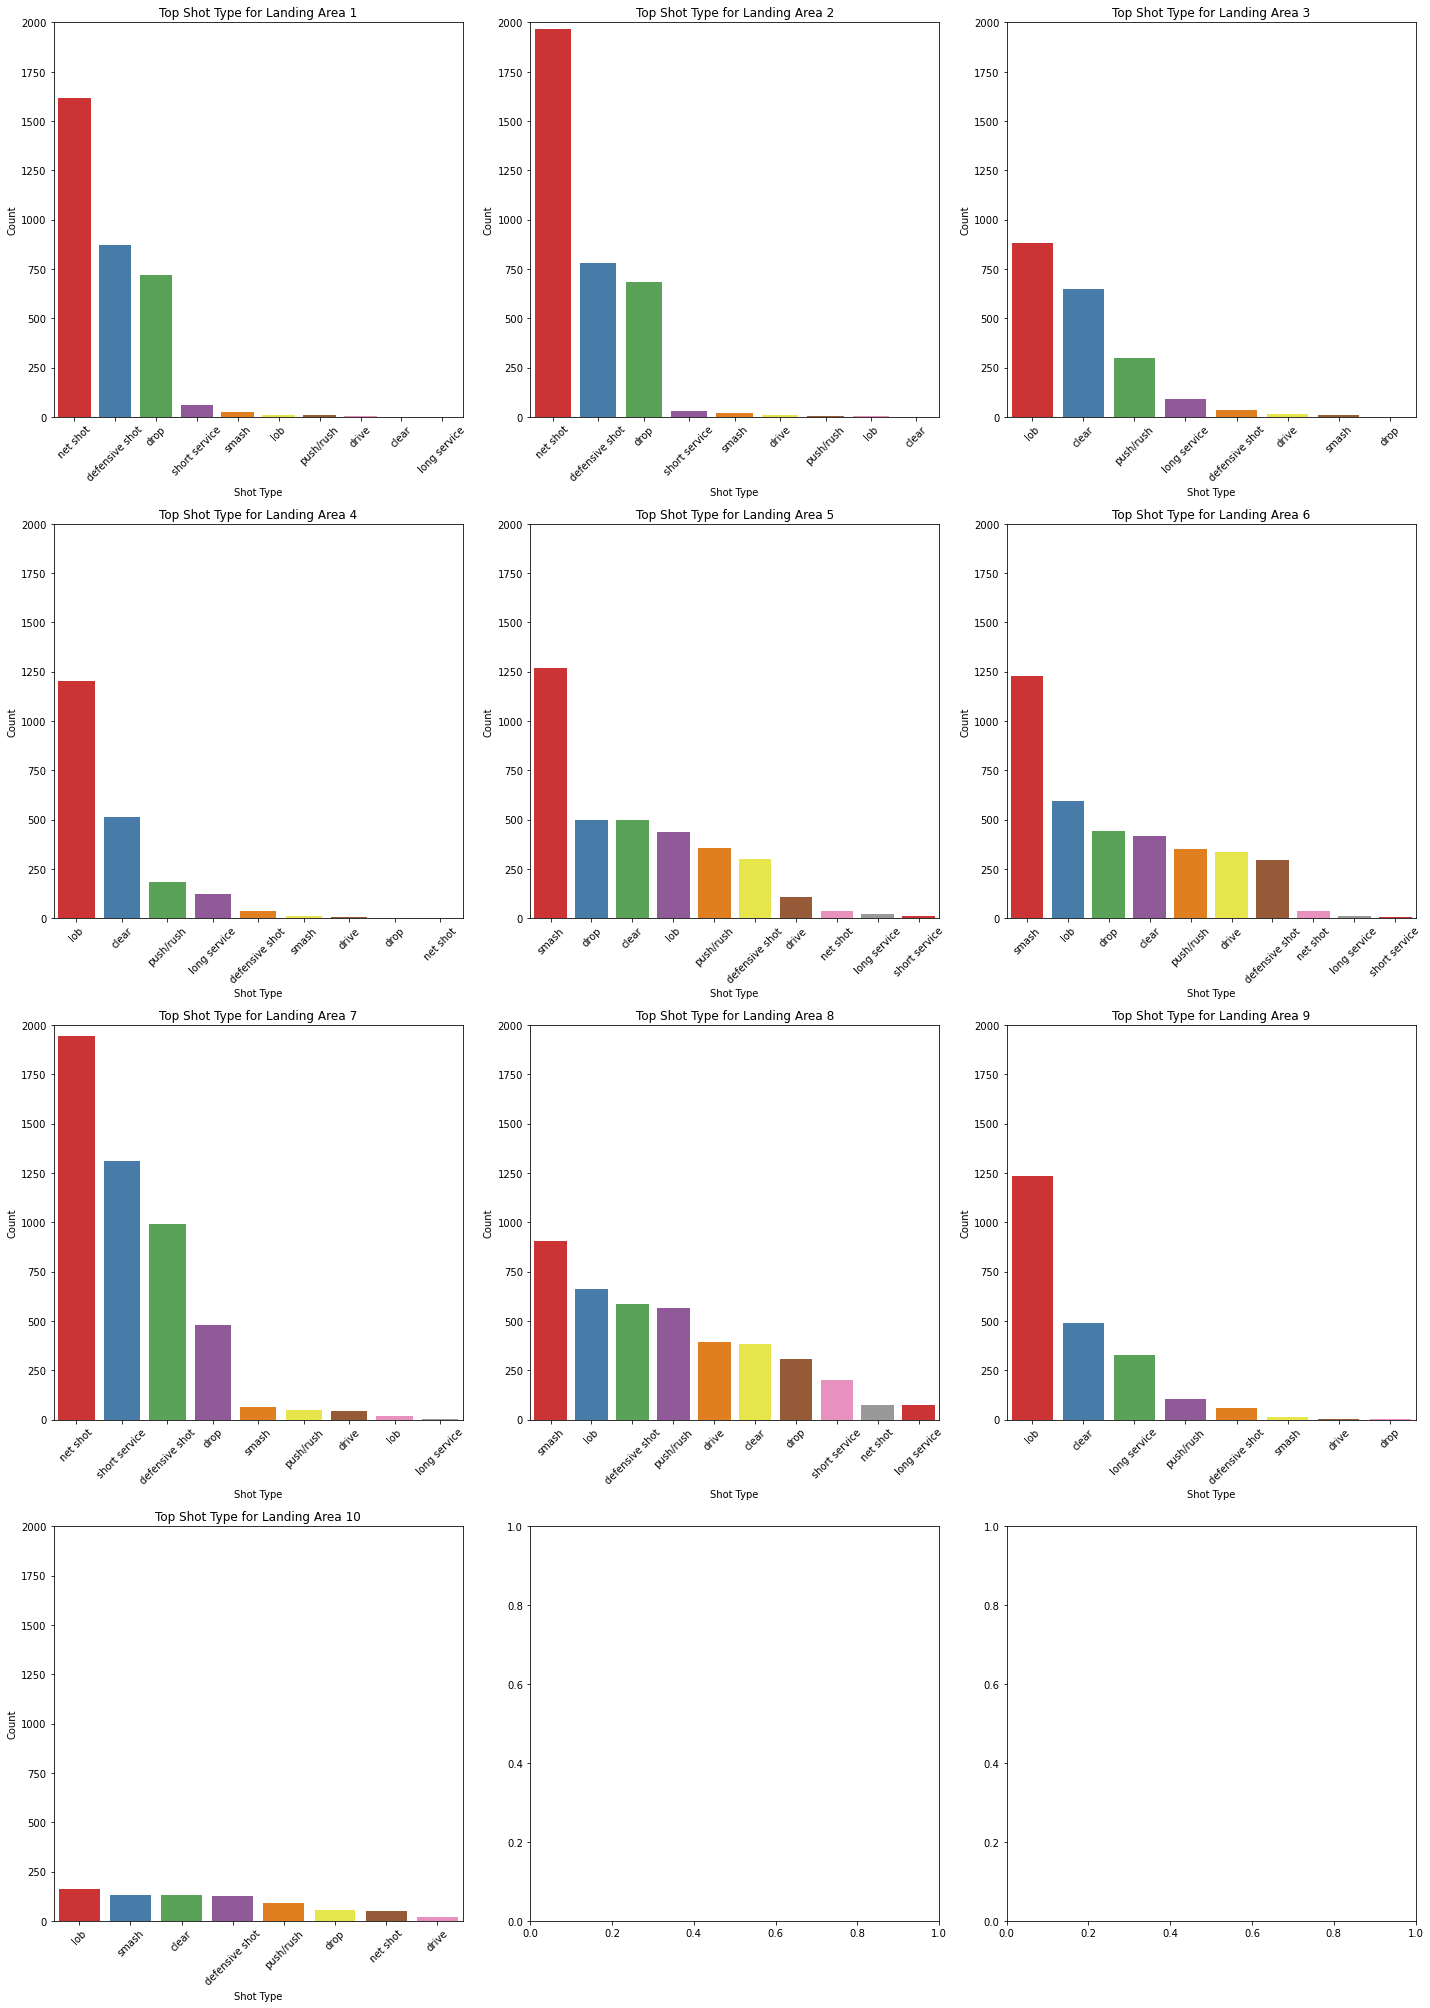

In [81]:
landing_area_list = df['landing_area'].unique().tolist()
landing_area_list.sort()
# counts = df.groupby('landing_area')['type'].value_counts().reset_index(name='count').sort_values(['landing_area', 'count'], ascending=[True, False])

def plot_top_shot_type(df, landing_area):
    num_plots = len(landing_area)
    fig, axs = plt.subplots((num_plots+2)//3, 3, figsize=(20, 7*(num_plots+2)//3))
    for i, land in enumerate(landing_area):
        counts = df[df['landing_area'] == land].groupby('type').size().reset_index(name='count').sort_values(['count'], ascending=[False])
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        sns.barplot(data=counts, x='type', y='count', palette='Set1', ax=ax)
        ax.set_ylim(0, 2000)
        ax.set_title(f'Top Shot Type for Landing Area {land}')
        ax.set_xticklabels(counts['type'], rotation=45)
        ax.set_xlabel('Shot Type')
        ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_top_shot_type(df, landing_area_list)